In [471]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [472]:
df=pd.read_csv("emails_combined.csv")
df.head(10)

,Category,Subject,From,Date,Body
0,important,Re: Granting permission to access the upcoming...,Team Phitron <support@phitron.io>,"Tue, 23 Apr 2024 03:49:28 +0000","Hi Amanot Ullah 42, ​অ্যাক্সেস ডান। ..."
1,important,Granting permission to access the upcoming dat...,Amanot Ullah 42 <aman118375@gmail.com>,"Tue, 23 Apr 2024 03:55:51 +0700","Assalamuwalaikum,\n\nI am a student of Phitron..."
2,important,[beecrowd] Password Reset,beecrowd <portal@beecrowd.com.br>,"Wed, 14 Sep 2022 13:25:27 +0000","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
3,important,Lilith Games - Email Address Verification Code,service@email.lilithgame.com,"Tue, 02 Jul 2024 21:03:18 +0800","<!DOCTYPE html>\n<html lang=""en"">\n\n<head>\n ..."
4,important,Assignment Marks,Phitron <noreply@phitron.io>,"Fri, 16 Dec 2022 20:58:37 +0000",NaN
5,important,MathWorks Account Password Reset Request,service@account.mathworks.com,"Wed, 13 Mar 2024 04:53:17 +0000","<!doctype html>\n<html xmlns=""http://www.w3.or..."
6,important,MathWorks Account Password Reset Request,service@account.mathworks.com,"Wed, 13 Mar 2024 04:52:54 +0000","<!doctype html>\n<html xmlns=""http://www.w3.or..."
7,important,Your Zoom password has been reset.,Zoom <no-reply@zoom.us>,"Fri, 22 Apr 2022 17:06:03 +0000 (UTC)","<html>\n<body>\nDear Amanot Ullah, <br/>\n<br/..."
8,important,Verify Your Mail,Phitron <noreply@phitron.io>,"Sat, 24 Sep 2022 10:10:03 +0000",Please confirm your email by following the bel...
9,important,=?utf-8?B?Q29kZWZvcmNlcyAtIEVtYWlsIGNvbmZpcm1h...,noreply@codeforces.com,"Wed, 14 Sep 2022 16:39:01 +0300 (MSK)","Hello, aman_loser.\n\nYour email was provided ..."


In [473]:
df.groupby("Category").describe()

Subject                                                     From  \
            count unique                                    top freq count   
Category                                                                     
important     136     98                       Assignment Marks   11   136   
spam           16     16  How to Start a Career in Data Science    1    16   

                                                           Date         \
          unique                                 top freq count unique   
Category                                                                 
important     53             Zoom <no-reply@zoom.us>   20   136    135   
spam           5  365 Team <team@365datascience.com>    7    16     16   

                                                      Body         \
                                            top freq count unique   
Category                                                            
important       Sat, 24 Sep 2022 14:53:51 +0000    2   121    108   
spam       Tue, 6 Aug 2024 14:49:56 -0400 (EDT)    1    16     16   

                                                                   
                                                         top freq  
Category                                                           
important                                                 \n   10  
spam       <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 T...    1

here we see that there have some features which have no impact on this model , such as From , Date, Subject . So we need to drop this feature from this model for preventing error .

### Drop values 

In [474]:
x=df.drop(['From','Subject','Date'],axis="columns")
x

,Category,Body
0,important,"Hi Amanot Ullah 42, ​অ্যাক্সেস ডান। ..."
1,important,"Assalamuwalaikum,\n\nI am a student of Phitron..."
2,important,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
3,important,"<!DOCTYPE html>\n<html lang=""en"">\n\n<head>\n ..."
4,important,NaN
...,...,...
147,spam,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
148,spam,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
149,spam,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
150,spam,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."


In [475]:
df.Body[140]

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html dir="ltr" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:o="urn:schemas-microsoft-com:office:office">\n<head><meta charset="UTF-8"><meta content="width=device-width, initial-scale=1" name="viewport"><meta name="x-apple-disable-message-reformatting"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta content="telephone=no" name="format-detection">\n\t<title>[LAST HOURS!] Accumulate points for the beecrowd Honeypot monthly prize!</title>\n\t<!--[if (mso 16)]><style type="text/css">     a {text-decoration: none;}     </style><![endif]--><!--[if gte mso 9]><style>sup { font-size: 100% !important; }</style><![endif]--><!--[if gte mso 9]><xml> <o:OfficeDocumentSettings> <o:AllowPNG></o:AllowPNG> <o:PixelsPerInch>96</o:PixelsPerInch> </o:OfficeDocumentSettings> </xml>\n<![endif]-->\n\t<style type="text/css">.rollover:hover .rollover-first { max-height:

In [476]:
x.shape

(152, 2)

In [477]:
df.nunique()

Category      2
Subject     114
From         57
Date        151
Body        124
dtype: int64

In [478]:
x.nunique()

Category      2
Body        124
dtype: int64

### handling null values 


In [479]:
x.isna().sum()

Category     0
Body        15
dtype: int64

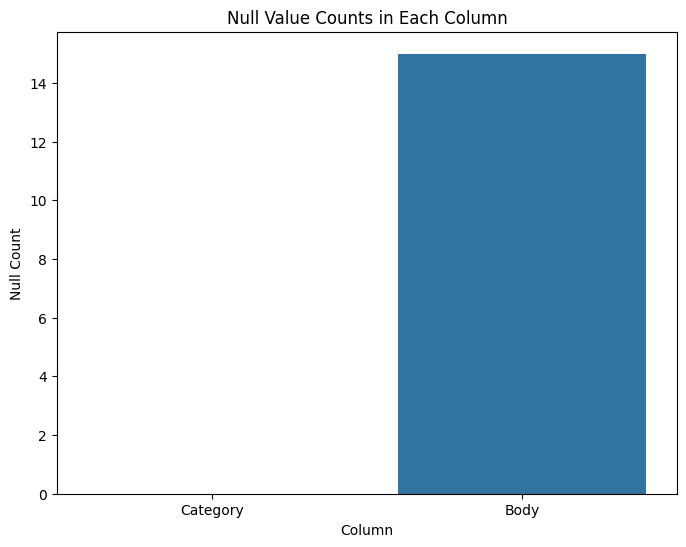

In [480]:
n = x.isna().sum().reset_index()
n.columns = ['Column', 'Null Count']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Column', y='Null Count', data=n)
plt.title('Null Value Counts in Each Column')
#plt.xticks(rotation=45)
plt.show()

In [481]:
x=x.dropna(subset=['Body'])
x.isna().sum()


Category    0
Body        0
dtype: int64

In [482]:
x.describe()

,Category,Body
count,137,137
unique,2,124
top,important,\n
freq,121,10


here we see that there have samne no of count 

In [483]:
x.head()

,Category,Body
0,important,"Hi Amanot Ullah 42, ​অ্যাক্সেস ডান। ..."
1,important,"Assalamuwalaikum,\n\nI am a student of Phitron..."
2,important,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
3,important,"<!DOCTYPE html>\n<html lang=""en"">\n\n<head>\n ..."
5,important,"<!doctype html>\n<html xmlns=""http://www.w3.or..."


In [484]:
x.groupby("Category").describe()

Body                                                               
          count unique                                                top freq
Category                                                                      
important   121    108                                                 \n   10
spam         16     16  <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 T...    1

A lambda function can take any number of arguments, but can only have one expression.


In [485]:
x.loc[:, 'spam'] = x['Category'].apply(lambda x: 1 if x == 'spam' else 0)
x.head

C:\Users\AU Aman\AppData\Local\Temp\ipykernel_12556\1475271578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:, 'spam'] = x['Category'].apply(lambda x: 1 if x == 'spam' else 0)


<bound method NDFrame.head of       Category                                               Body  spam
0    important  Hi Amanot Ullah 42,  ​অ্যাক্সেস ডান।          ...     0
1    important  Assalamuwalaikum,\n\nI am a student of Phitron...     0
2    important  <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 T...     0
3    important  <!DOCTYPE html>\n<html lang="en">\n\n<head>\n ...     0
5    important  <!doctype html>\n<html xmlns="http://www.w3.or...     0
..         ...                                                ...   ...
147       spam  <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 T...     1
148       spam  <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 T...     1
149       spam  <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 T...     1
150       spam  <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 T...     1
151       spam  <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 T...     1

[137 rows x 3 columns]>

### Split the data into 2 parts 

In [486]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x['Body'],x['spam'],test_size=0.35)

In [487]:
len(X_test)

48


####  Message column has text, we need to convert this text into numbers 

In [488]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

transform: Converts the text data in X_train into a matrix of word counts

In [489]:
X_train_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12727 stored elements and shape (89, 3990)>

CountVectorizer will split the text into words (tokens) and count the occurrences of each word in the dataset.

transform: Converts the text data in X_train into a matrix of word counts, where each row corresponds to a document and each column corresponds to a word from the vocabulary

.toarray() converts the sparse matrix X_train_count into a dense numpy array, where the shape of the array is (number_of_documents, vocabulary_size).


In [490]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

We use this model for a predictions....

In [491]:
emails = [
    '  Dear All, \n welcome you all to this course!! \n Please join a class today (Thursday) at 11AM. \n Link: https://bdren.zoom.us/j/9051 \n Thanks.',
    
    
    '<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html dir="ltr" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:o="urn:schemas-microsoft-com:office:office">\n<head><meta charset="UTF-8"><meta content="width=device-width, initial-scale=1" name="viewport"><meta name="x-apple-disable-message-reformatting"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta content="telephone=no" name="format-detection">\n\t<title>[LAST HOURS!] Accumulate points for the beecrowd Honeypot monthly prize!</title>\n\t<!--[if (mso 16)]><style type="text/css">     a {text-decoration: none;}     </style><![endif]--><!--[if gte mso 9]><style>sup { font-size: 100% !important; }</style><![endif]--><!--[if gte mso 9]><xml> <o:OfficeDocumentSettings> <o:AllowPNG></o:AllowPNG> <o:PixelsPerInch>96</o:PixelsPerInch> </o:OfficeDocumentSettings> </xml>\n<![endif]-->\n\t<style type="text/css">.rollover:hover .rollover-first { max-height:0px!important; display:none!important;}.rollover:hover .rollover-second { max-height:none!important; display:block!important;}.rollover span { font-size:0px;}u + .body img ~ div div { display:none;}#outlook a { padding:0;}span.MsoHyperlink,span.MsoHyperlinkFollowed { color:inherit; mso-style-priority:99;}a.es-button { mso-style-priority:100!important; text-decoration:none!important;}a[x-apple-data-detectors] { color:inherit!important; text-decoration:none!important; font-size:inherit!important; font-family:inherit!important; font-weight:inherit!important; line-height:inherit!important;}.es-desk-hidden { display:none; float:left; overflow:hidden; width:0; max-height:0; line-height:0; mso-hide:all;} .es-button-border:hover { border-color:#662483 #662483 #662483 #662483!important; background:#C2A7CD!important;}\n.es-button-border:hover a.es-button,.es-button-border:hover button.es-button { background:#C2A7CD!important; color:#000000!important;}@media only screen and (max-width:600px) {h1 { font-size:30px!important; text-align:left } h2 { font-size:24px!important; text-align:left } h3 { font-size:20px!important; text-align:left } .es-m-p20b { padding-bottom:20px!important } .es-m-p0 { padding:0px!important } *[class="gmail-fix"] { display:none!important } p, a { line-height:150%!important } h1, h1 a { line-height:120%!important } h2, h2 a { line-height:120%!important } h3, h3 a { line-height:120%!important } h4, h4 a { line-height:120%!important } h5, h5 a { line-height:120%!important } h6, h6 a { line-height:120%!important } h4 { font-size:24px!important; text-align:left } h5'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [492]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9583333333333334

Optional(Pipelining)

In [493]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nw',MultinomialNB())
])

In [494]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nw', MultinomialNB())])

In [495]:
clf.score(X_test,y_test)

0.9583333333333334

In [496]:
clf.predict(emails)

array([0, 1], dtype=int64)

In [497]:
clf.predict_proba(emails)

array([[1.00000000e+00, 1.96323934e-18],
       [9.63189367e-42, 1.00000000e+00]])